## Make a subset of a data cube

This notebook shows how to view the metadata of a data cube and how to make a subset cube for a particular region of interest. 

---

Importing necessary libraries

In [1]:
import shapely
import xarray as xr
from xcube.api import clip_dataset_by_geometry, read_cube

Load a cube from bucket in the cloud:

In [2]:
cube = read_cube('http://obs.eu-de.otc.t-systems.com/dcs4cop-obs-01/MSI_L2_VITO_Chla_SPM_31UET_v041-optimized.zarr')

View the metadata of the cube:

In [3]:
cube

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 512, lon: 512, time: 107)
Coordinates:
  * lat       (lat) float64 54.5 54.49 54.48 54.47 ... 50.53 50.52 50.51 50.5
    lat_bnds  (lat, bnds) float64 dask.array<shape=(512, 2), chunksize=(512, 2)>
  * lon       (lon) float64 0.5039 0.5117 0.5195 0.5273 ... 4.48 4.488 4.496
    lon_bnds  (lon, bnds) float64 dask.array<shape=(512, 2), chunksize=(512, 2)>
  * time      (time) datetime64[ns] 2017-01-16T10:53:55.460999936 ... 2017-12-30T11:04:39.456000
Dimensions without coordinates: bnds
Data variables:
    Chla      (time, lat, lon) float32 dask.array<shape=(107, 512, 512), chunksize=(1, 256, 256)>
    SPM_665   (time, lat, lon) float32 dask.array<shape=(107, 512, 512), chunksize=(1, 256, 256)>

Print out the time stamps avaialbe in the cube:

In [4]:
# cube.time.values

Print out the number of time stamps

In [5]:
cube.time.shape

(107,)

View the metadata of a cubes variable:

In [6]:
cube.Chla

<xarray.DataArray 'Chla' (time: 107, lat: 512, lon: 512)>
dask.array<shape=(107, 512, 512), dtype=float32, chunksize=(1, 256, 256)>
Coordinates:
  * lat      (lat) float64 54.5 54.49 54.48 54.47 ... 50.53 50.52 50.51 50.5
  * lon      (lon) float64 0.5039 0.5117 0.5195 0.5273 ... 4.48 4.488 4.496
  * time     (time) datetime64[ns] 2017-01-16T10:53:55.460999936 ... 2017-12-30T11:04:39.456000
Attributes:
    algorithm:           
    ds_flag:             Analysis Ready Data. D6.1 - Product Specification Do...
    grid_mapping:        transverse_mercator
    long_name:           Chla S2
    reference:           RBINS v041 - D6.6 - Multi-Sensor Algorithm Improveme...
    spatial_resampling:  Nearest
    standard_name:       mass_concentration_of_chlorophyll_a_in_sea_water
    units:               mg m-3

View the shape and the chunking of a data cubes variable:

In [7]:
cube.Chla.data

dask.array<zarr, shape=(107, 512, 512), dtype=float32, chunksize=(1, 256, 256)>

Plot a cubes variable for a specific time stamp.

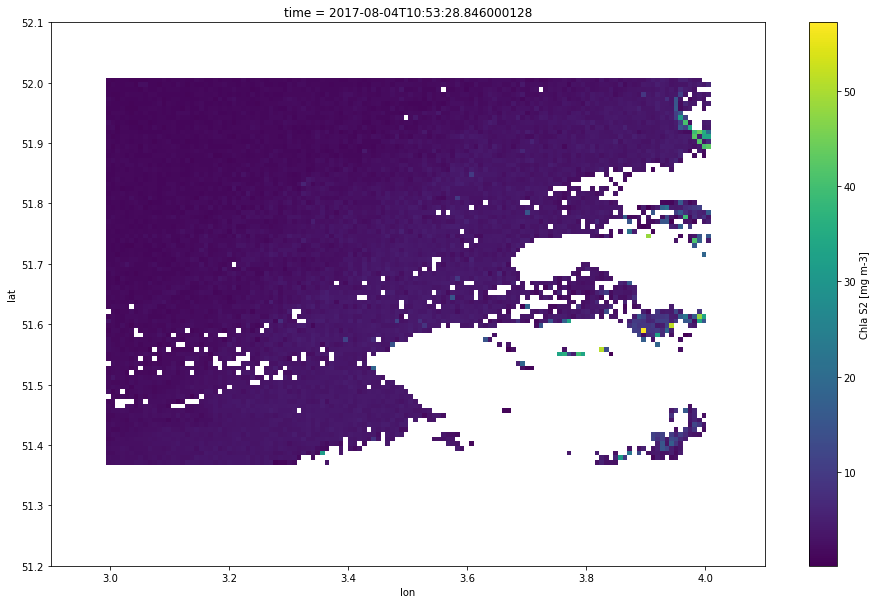

In [14]:
cube.Chla.isel(time=47).plot.imshow(figsize=(16,10), xlim = (2.9, 4.1), ylim = (51.2,52.1))

Define an area to make a subset of a cube.

In [9]:
x1 = 3.4  # degree
y1 = 51.6  # degree
x2 = 3.8  # degree
y2 = 51.8  # degree

bbox = x1, y1, x2, y2

Convert bounding box into a shapely object.

In [10]:
bbox = shapely.geometry.box(*bbox)

Clip cube by using the bounding box. 

In [11]:
subset_cube = clip_dataset_by_geometry(cube,bbox)

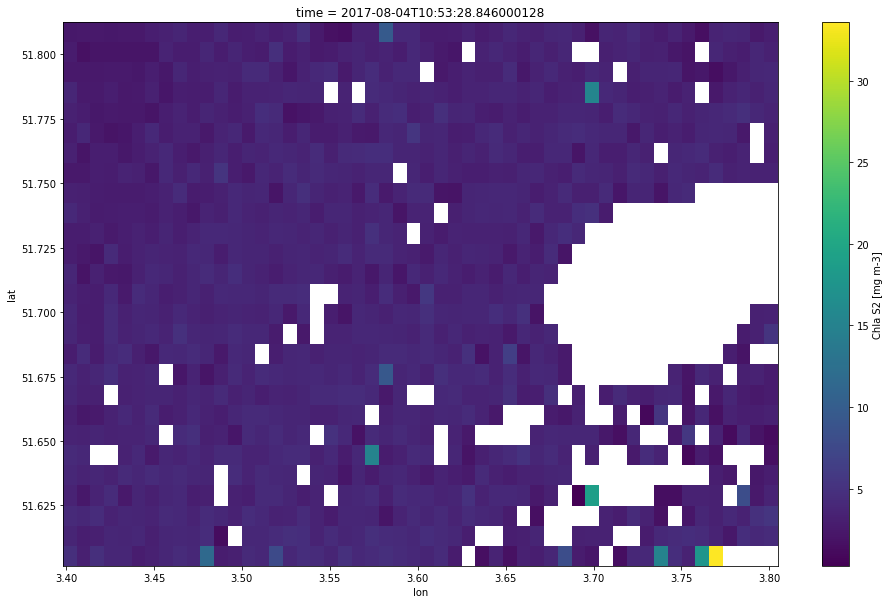

In [12]:
subset_cube.Chla.isel(time=47).plot.imshow(figsize=(16,10))

The subset cube can be saved locally with:

In [13]:
# subset_cube.to_zarr('subset_cube_output_path.zarr')